In [25]:


from DrawSolution import draw_all_pallets
from class_item import Item
import copy
from matplotlib import pyplot as plt
from matplotlib import patches
import generate 
import pallet
import time
import math
import numpy as np

import pdb


In [26]:



# eps = 1

# poligon1 = [[0,1,0], [1,1,1], [0,1,0], []]
# poligon2 = [[1,1], [1,0]]
# poligon3 = [[1,1,1], [0,1,0]]

# points_1 = [[0,3], [2,0], [3,1], [2,1], [1, 4]]
# points_2 = [[0,0], [1,0], [1,8], [0,8]]
# points_3 = [[0,3], [2,0], [2,1], [3,2], [1, 4]]

# pol_1 = [[0,0], [4,0], [4,1], [2,1], [2, 2], [0, 2]]
# pol_2 = [[1,0], [2,0], [2,3], [1,3], [1, 2], [0, 2], [0, 1], [1, 1]]
# pol_3 = [[2,0], [3,0], [3,1], [4,1], [4, 2], [5, 2], [5, 3], [0, 3], [0, 2], [1, 2], [1, 1], [2, 1]]


# pol_1_matrix = [[2, 1, -2, -1], [4, 3, 2, 1]]
# pol_2_matrix = [[-1, 1], [2, 1], [-1, 1]]
# pol_3_matrix = [[5, 4, 3, 2, 1], [-1, 3, 2, 1, -1], [-2, -1, 1, -2, -1]]


# poligons = [copy.deepcopy(pol_1), copy.deepcopy(pol_2), copy.deepcopy(pol_3)]

# # poligons = [copy.deepcopy(points_2),copy.deepcopy(points_2)]
# items = [Item(i, poligons[i]) for i in range(len(poligons))]


# items[0].matrix = copy.deepcopy(pol_1_matrix)
# items[1].matrix = copy.deepcopy(pol_2_matrix)
# items[2].matrix = copy.deepcopy(pol_3_matrix)




# matrix = [[0,0,0,0,0,0],
#           [2,1,0,0,0,1],
#           [3,2,1,0,1,0],
#           [4,3,2,1,0,0],
#           [0,2,1,1,0,0],
#           [0,0,0,3,2,1]]



# eps = 1
# pallet_width = 6
# pallet_height = 6
# pal = pallet.Pallet(0, pallet_width, pallet_height, eps)


In [27]:
def print_matrix(matrix):
    for i in range(len(matrix)):
        print(matrix[i])
        print('\n')

In [28]:



eps = 1
pallet_width = 10
pallet_height = 10
numPoligons = 20


# t = time.time()
g= generate.Generator(pallet_width, pallet_height, numPoligons )
g.start(eps)
items = g.data
# print(time.time() - t)
# print(items[0].matrix)
# print(items[0].listMatrix[0])

# print([item.id for item in items])
pal = pallet.Pallet(0, pallet_width, pallet_height, eps)
itemsCopy = copy.deepcopy(items)

# for item in itemsCopy:
#     print(item.id)
# print_matrix(items[0].matrix)



[[1 1]
 [1 0]]
[[0 0 1 1 1]
 [1 1 1 1 0]
 [1 1 1 1 0]
 [1 1 1 0 0]
 [0 1 0 0 0]]
[[1 1 1]
 [1 1 0]]
[[1]
 [1]
 [1]
 [1]]
[[1 1 1]
 [0 1 1]]
[[0 0 0 1 1]
 [0 1 1 1 0]
 [1 1 1 0 0]
 [1 1 0 0 0]]
[[1 1 1 1 1]
 [1 1 1 1 0]
 [0 1 1 1 0]
 [0 0 1 0 0]]
[[1 1]
 [1 1]
 [1 1]
 [0 1]]
[[1 1 1 1]
 [1 1 1 0]
 [1 1 0 0]]
[[0 0 0 1 1]
 [0 0 1 1 1]
 [1 1 1 1 0]
 [1 1 1 1 0]
 [1 1 1 1 0]]
[[1 1 0 0]
 [1 1 1 0]
 [0 1 1 0]
 [0 0 1 1]
 [0 0 0 1]]
[[1 0]
 [1 0]
 [1 1]]
[[0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]]
[[1 1 0]
 [1 1 0]
 [1 1 0]
 [1 1 1]
 [0 1 1]]
[[0 1 1 0]
 [1 1 1 0]
 [1 1 1 0]
 [1 1 1 1]
 [1 1 1 1]]
[[1 1]
 [0 1]]
[[0 0 0 1 1]
 [0 0 1 1 1]
 [0 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 0 0]]
[[1]
 [1]]
[[1 1 1 0]
 [1 1 1 1]
 [1 1 0 0]]
[[1 1 0 0 0]
 [1 1 1 0 0]
 [0 1 1 1 0]
 [0 0 1 1 1]]
[1 1]


[1 0]




In [29]:
# def draw_pallet(items, pallet_width, pallet_height):
#     # fig, ax = plt.subplots(figsize=(pallet_height, pallet_height))
#     fig, ax = plt.subplots()
#     pallet = patches.Rectangle((0, 0), pallet_width, pallet_height, linewidth=2, facecolor='none', edgecolor='blue')
#     ax.add_patch(pallet)
#     ax.set_xlim(-1, pallet_width + 1)
#     ax.set_ylim(-1, pallet_height + 1)
#     for item in items:
#         for point in item.points:
#             point0_copy = point[0]
#             point[0] = math.cos(item.rotation)*point[0] - math.sin(item.rotation)*point[1]
#             point[1] = math.sin(item.rotation)*point0_copy + math.cos(item.rotation)*point[1]
#         item.surfPoint()
#         for point in item.points:
#             point[0] += item.lb_x
#             point[1] += item.lb_y
#         polygon = patches.Polygon(item.points)
#         ax.add_patch(polygon)
#     return fig, ax

In [30]:
def check_position(a, b):

    check = True
    surf = 1
    if a == 0:

        check = True
        surf = 1
       
    else:

        if b > 0:

            check = False
            surf = a
            
        else:

            if b in range(0, -a, -1):
                check = False
                surf = a+b
                
            else:

                check = True
                surf = 1

    return check, surf

def check_item(pallet, itemMatrix):
    lb_x = -1
    lb_y = -1

    for i in range( len(pallet)):

        j = 0
        while j < len( pallet[0]):
 
            exit = False
            check = check_position(pallet[i][j],itemMatrix[0][0]  )

            # print(time.time() - t)
            if check[0]:

                if len(itemMatrix) + i <= len(pallet) and len(itemMatrix[0]) + j <= len(pallet[0]):

                    # располагаем объект
                    for p in range(len(itemMatrix)):

                        for k in range(len(itemMatrix[0])):

                            # решаем есть ли пересечение
                            if pallet[i+p][j+k] > 0:

                                if itemMatrix[p][k] > 0:
                                    
                                    exit = True
                                    break
                        if exit:
                            
                            break
                else:

                    exit = True

                # если пересечений нет и элемент влезает, то добавляем его
                if not exit:
                    
                    lb_x = i
                    lb_y = j    
                    break

            else:
                exit = True
                
            j+=check[1]
                
        if not exit:
           
            break

    
    return exit, lb_x, lb_y  


# def fit_item_1(pallet, item, itemMatrix):
    

#     for i in range( len(pallet)):

#         j = 0
#         while j < len( pallet[0]):
 
#             exit = False
#             check = check_position(pallet[i][j],itemMatrix[0][0]  )

#             # print(time.time() - t)
#             if check[0]:
#                 if len(itemMatrix) + i <= len(pallet) and len(itemMatrix[0]) + j <= len(pallet[0]):
#                     # располагаем объект
#                     for p in range(len(itemMatrix)):
#                         for k in range(len(itemMatrix[0])):
#                             # решаем есть ли пересечение
#                             if pallet[i+p][j+k] > 0:
#                                 if itemMatrix[p][k] > 0:
#                                     exit = True
#                                     break
#                         if exit:
#                             break
#                 else:
#                     exit = True

#                 # если пересечений нет и элемент влезает, то добавляем его
#                 if not exit:
                    
#                     # print(i,j, 'exp')
#                     item.lb_x = i
#                     item.lb_y = j
                    
#                     for p in range(len(itemMatrix)):
#                         k = 0
#                         while k < len(itemMatrix[0]):
#                             if  itemMatrix[p][k] > 0:
#                                 pallet[i+p][j+k] += itemMatrix[p][k]
#                                 k+=1
#                             else:
#                                 k-= itemMatrix[p][k]


#                     break

#             else:
#                 exit = True
                
#             j+=check[1]
                
            
#         if not exit:
#             # print(i,j,'finish')
#             break

    
#     return pallet, exit

In [31]:
def fit_item(pallet, itemMatrix, i, j ):

    for p in range(len(itemMatrix)):

        k = 0
        while k < len(itemMatrix[0]):

            if  itemMatrix[p][k] > 0:

                pallet[i+p][j+k] += itemMatrix[p][k]
                k+=1
            else:

                k-= itemMatrix[p][k]
    
    return None


def fit_item_all_route(pallet, item):
    listMatrix = item.listMatrix 
    
    bounder_y = pallet.shape[1]
    bounder_x = pallet.shape[0]
    
    rout = 0
    exit = True
    for r in range(4):  
        
        sol = check_item(pallet,  listMatrix[r])
        if sol[0] == False:
            if sol[1] + len(listMatrix[r]) <=  bounder_x:
                if sol[2] <  bounder_y:
                    item.lb_x = sol[1]
                    item.lb_y = sol[2]
                    item.rotation = r * math.pi / 2
                    exit = False
                    bounder_x = sol[1]  + len(listMatrix[r])
                    bounder_y = sol[2]  
                    rout = r

        
    if not exit:
        fit_item(pallet, listMatrix[rout], item.lb_x, item.lb_y )

    
    return pallet, exit


# def fit_item_all_route_1(pallet, item):
#     listMatrix = item.listMatrix 
    
    
#     bounder = len(pallet)
#     y = len(pallet[0])
#     # t = time
#     # pal = pallet.Pallet(0, pallet_width, pallet_height, eps)

#     copyPallet = copy.deepcopy(pallet)

#     exit = True
#     for r in range(4):  
#         # t = time.time()
#         copyItem = copy.deepcopy(item)
#         # print(time.time() - t)
#         sol = fit_item_1(copy.deepcopy(copyPallet), copyItem, listMatrix[r])
#         if sol[1] == False:
#             # lb_x or lb_y ?
#             if copyItem.lb_x  + len(listMatrix[r]) <=  bounder:
#                 if copyItem.lb_y < y:
  
#                     item.lb_x = copyItem.lb_x
#                     item.lb_y = copyItem.lb_y
#                     pallet = sol[0]
#                     item.rotation = r * math.pi / 2
#                     exit = False
#                     bounder = copyItem.lb_x  + len(listMatrix[r])
#                     y = copyItem.lb_y

        
        
    

    
#     return pallet, exit

In [32]:

def find_lb_coordinates(items, eps):
    for item in items:
        item.lb_x = item.lb_x * eps
        item.lb_y = item.lb_y * eps
        
    return items


# # для того что бы убрать поворот, замени метод fit_item_all_route  на fit_item
def fit_pallets(matrix_shape, items, eps):
    
    pallets = []
    pallets.append(np.zeros(matrix_shape, dtype = np.uint16))
    for item in items:
 
        i=0
        exit = True
        while exit and i<len(pallets):
            # print(pallets[i].rot90(), i )
           
            pallets[i], exit = fit_item_all_route(pallets[i], item)
            if exit and i==(len(pallets)-1):

                pallets.append(np.zeros(matrix_shape, dtype = np.uint16))
            if not exit:
                
                item.pallet_number = i
            i+=1

            # draw_all_pallets(understand_pallets(items), pallet_width, pallet_height)
     
    find_lb_coordinates(items, eps)

    return pallets
    

# def fit_pallets_1(matrix, items, eps):
#     pallets = []
#     pallets.append(copy.deepcopy(matrix))
#     # 
#     for item in items:
 
#         i=0
#         exit = True
#         while exit and i<len(pallets):
#             # print(i)
#             pallets[i], exit = fit_item_all_route_1(pallets[i], item)
#             if exit and i==(len(pallets)-1):
#                 # 
#                 pallets.append(copy.deepcopy(matrix))
#                 # 
#             if not exit:
#                 item.pallet_number = i
 
#             i+=1
     
#     find_lb_coordinates(items, eps)

#     return pallets



In [33]:
def understand_pallets(items):
    packing = []
    usedNumPallet = max([item.pallet_number for item in items])

    for i in range(usedNumPallet  + 1):
        # print(i)
        packing.append([])

    for i in range(usedNumPallet  + 1):
        for item in items:
            if item.pallet_number > len(packing):
                    packing.append([])
            if item.pallet_number == i:
                packing[i].append(item)
    


    return packing


In [34]:


def swap(list, pos1, pos2):

    list[pos1], list[pos2] = list[pos2], list[pos1]
    return list


# перениси это item class
def clearCoordinat(item):
    item.lb_x = None
    item.lb_y = None
    item.rotation = 0.0
    item.pallet_number = None

    return None


#  алгоритм локального поиска
def locSearch(matrix_shape , poligons, eps):

    n = len( poligons)
    objVal = len(fit_pallets(matrix_shape,  poligons, eps))

    # print(poligons[0].lb_x)
    stop = False
    while not stop:
        # print([item.id for item in poligons])
        

        betterNeighboor = (0,0)
        stop = True
        for i in range(n):

            for j in range(i + 1, n):

                for poligon in poligons:
                    clearCoordinat(poligon)

            
                pal = fit_pallets(matrix_shape, swap(poligons, i, j), eps)
                swap(poligons, i, j)
                
                val = len(pal)
                # print('1', val, 'c', i, j)
                if val < objVal:
                    # print(i,j)
                    

                    stop = False
                    objVal = val
                    betterNeighboor = (i,j)
                    

            
        if betterNeighboor != (0,0):
            # print('1*1')
            fit_pallets(matrix_shape, swap(poligons, betterNeighboor[0], betterNeighboor[1]), eps)
            
    for poligon in poligons:
        clearCoordinat(poligon)
    fit_pallets(matrix_shape,  poligons, eps)

        # print([item.id for item in poligons])
        
                

    # for item in poligonsBest:
    #     print(item.lb_x, item.lb_y, item.rotation)
    draw_all_pallets(understand_pallets(poligons), pallet_width, pallet_height)

    return objVal


# def locSearch_1(matrix_shape , poligons, eps):

#     n = len( poligons)
#     objVal = len(fit_pallets_1(matrix_shape,  poligons, eps))


#     poligonsBest = copy.deepcopy(poligons)
#     stop = False
#     while not stop:
#         betterNeighboor = (0,0)
        
#         stop = True
#         for i in range(n):

#             for j in range(i + 1, n):

#                 pal = fit_pallets_1(matrix_shape, swap(copy.deepcopy(poligonsBest), i, j), eps)
                
#                 val = len(pal)
#                 # print('2', val, 'c', i, j)
#                 if val < objVal:
#                     # print(i,j)
#                     stop = False
#                     objVal = val
#                     betterNeighboor = (i,j)
                    
#                     # draw_all_pallets(understand_pallets(poligonsBest))

#         if betterNeighboor != (0,0):
#             # print('2*2')
#             fit_pallets_1(matrix_shape, swap(poligonsBest, betterNeighboor[0], betterNeighboor[1]), eps)
            

#         # print([item.id for item in poligonsBest])
                
#     poligons = poligonsBest
#     # for item in poligonsBest:
#     #     print(item.lb_x, item.lb_y, item.rotation)
#     draw_all_pallets(understand_pallets(poligons), pallet_width, pallet_height)

    # return objVal


0.05900287628173828


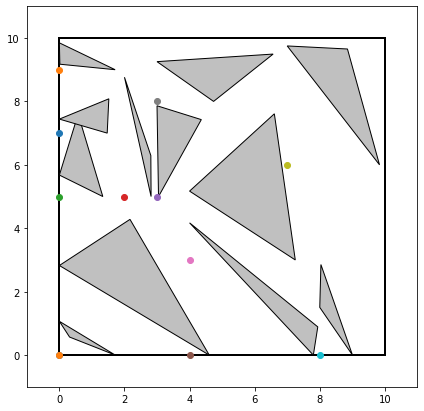

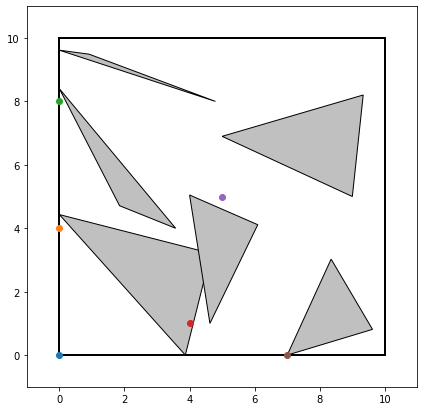

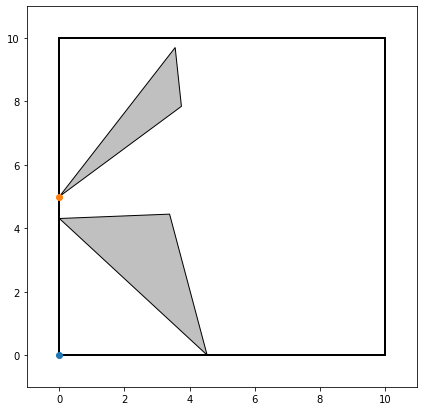

In [35]:

import FitPallets

# t = time.time()
# pal = pallet.Pallet(0, pallet_width, pallet_height, eps)
# print(time.time() - t)


items2 = copy.deepcopy(items)


t = time.time()
# l = np.zeros((pallet_width, pallet_height), dtype = np.uint16)
pal = fit_pallets(pal.shape, items2, eps )
# print(locSearch(pal.shape , items2, eps))
print(time.time() - t)
draw_all_pallets(understand_pallets(items2), pallet_width, pallet_height)

# print([item.id for item in items2])

# print(len(items))
# for item in items:
#     print(item.id)
#     item.show_item()


[2 1 0 1 0 3 2 1 1 1]


[1 0 3 2 1 2 1 2 1 1]


[0 4 3 2 1 4 3 2 1 0]


[0 4 3 2 1 3 2 1 2 1]


[3 2 1 2 1 1 2 1 2 1]


[0 3 2 1 3 2 1 0 2 1]


[3 2 1 0 4 3 2 1 0 1]


[2 1 0 5 4 3 2 1 2 1]


[3 2 1 0 0 0 0 3 2 1]


[1 0 0 0 0 0 4 3 2 1]




[0 0 0 2 1 0 0 2 1 1]


[0 0 3 2 1 3 2 1 2 1]


[4 3 2 1 3 2 1 0 2 1]


[4 3 2 1 2 1 0 0 1 0]


[4 3 2 1 2 1 0 0 1 0]


[0 5 4 3 2 1 2 1 0 0]


[0 4 3 2 1 3 2 1 0 0]


[3 2 1 0 0 3 2 1 0 0]


[4 3 2 1 0 4 3 2 1 0]


[2 1 0 0 0 4 3 2 1 0]


[[1.71734687 0.        ]
 [0.31331042 0.56883738]
 [0.         1.06525588]]
0 0
0.0
[2 1]


[ 1 -1]


[ 1 -1]


[2 1]


[-1  1]


[2 1]


[2 1]


[-1  1]




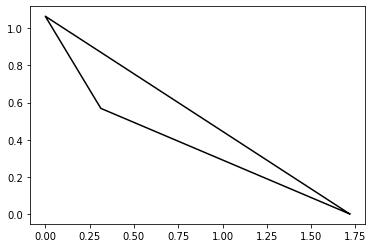

[1 1]


[1 0]


[[2.16935127 4.28035549]
 [0.         2.82520635]
 [4.60465004 0.        ]]
0 0
2.0
[-2 -1  3  2  1]


[ 4  3  2  1 -1]


[ 4  3  2  1 -1]


[ 3  2  1 -2 -1]


[-1  1 -3 -2 -1]


[ 1 -4 -3 -2 -1]


[ 3  2  1 -2 -1]


[ 4  3  2  1 -1]


[-1  4  3  2  1]


[-1  3  2  1 -1]


[-3 -2 -1  1 -1]


[-2 -1  3  2  1]


[-1  4  3  2  1]


[-1  4  3  2  1]


[ 3  2  1 -2 -1]


[-1  3  2  1 -1]


[ 4  3  2  1 -1]


[-1  4  3  2  1]


[-2 -1  3  2  1]


[-4 -3 -2 -1  1]




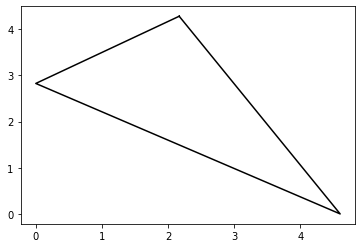

[0 0 1 1 1]


[1 1 1 1 0]


[1 1 1 1 0]


[1 1 1 0 0]


[0 1 0 0 0]


[[1.33449267 5.        ]
 [0.         5.67708659]
 [0.57627781 7.59847768]]
0 5
0.0
[3 2 1]


[ 2  1 -1]


[ 1 -1]


[2 1]


[2 1]


[-1  2  1]


[3 2 1]


[2 1]


[2 1]


[-1  1]




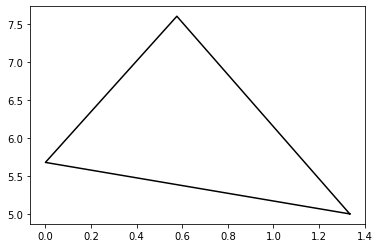

[1 1 1]


[1 1 0]


[[2.81763136 5.        ]
 [2.80990311 6.29225742]
 [2.         8.76238046]]
2 5
1.0
[1]


[1]


[1]


[1]


[4 3 2 1]


[1]


[1]


[1]


[1]


[4 3 2 1]




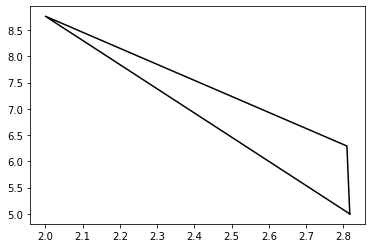

[1]


[1]


[1]


[1]


[[3.04585619 5.        ]
 [4.36054011 7.42590732]
 [3.         7.86265121]]
3 5
0.0
[3 2 1]


[-1  2  1]


[2 1]


[2 1]


[ 1 -1]


[ 2  1 -1]


[3 2 1]


[-1  1]


[2 1]


[2 1]




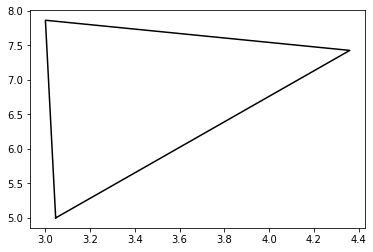

[1 1 1]


[0 1 1]


[[7.8024149  0.        ]
 [7.93886025 0.88958487]
 [4.         4.17080424]]
4 0
0.0
[-3 -2 -1  2  1]


[-1  3  2  1 -1]


[ 3  2  1 -2 -1]


[ 2  1 -3 -2 -1]


[ 1 -3 -2 -1]


[ 2  1 -2 -1]


[-1  2  1 -1]


[-1  3  2  1]


[-2 -1  2  1]


[-3 -2 -1  2  1]


[-2 -1  3  2  1]


[-1  3  2  1 -1]


[ 2  1 -3 -2 -1]


[ 2  1 -2 -1]


[ 3  2  1 -1]


[-1  2  1 -1]


[-2 -1  2  1]


[-3 -2 -1  1]




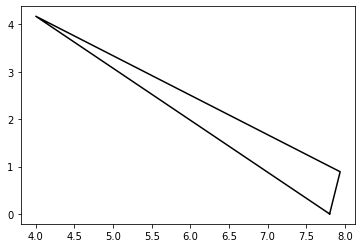

[0 0 0 1 1]


[0 1 1 1 0]


[1 1 1 0 0]


[1 1 0 0 0]


[[6.60428253 7.60913726]
 [4.         5.1709361 ]
 [7.24756097 3.        ]]
4 3
2.0
[5 4 3 2 1]


[ 4  3  2  1 -1]


[-1  3  2  1 -1]


[-2 -1  1 -2 -1]


[ 1 -3 -2 -1]


[ 3  2  1 -1]


[4 3 2 1]


[ 3  2  1 -1]


[ 2  1 -2 -1]


[-2 -1  1 -2 -1]


[-1  3  2  1 -1]


[-1  4  3  2  1]


[5 4 3 2 1]


[-2 -1  2  1]


[-1  3  2  1]


[4 3 2 1]


[-1  3  2  1]


[-3 -2 -1  1]




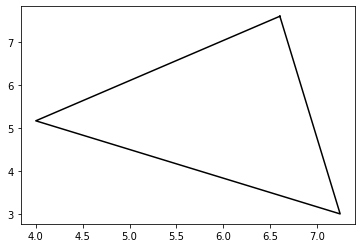

[1 1 1 1 1]


[1 1 1 1 0]


[0 1 1 1 0]


[0 0 1 0 0]


[[4.73708283 8.        ]
 [3.         9.25416058]
 [6.56670827 9.49275452]]
3 8
0.0
[2 1]


[2 1]


[2 1]


[-1  1]


[4 3 2 1]


[ 3  2  1 -1]


[ 1 -1]


[2 1]


[2 1]


[2 1]


[-1  3  2  1]


[4 3 2 1]




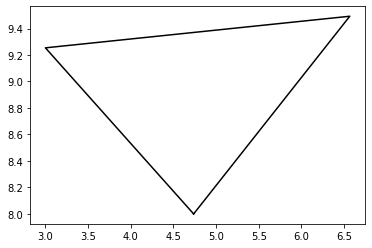

[1 1]


[1 1]


[1 1]


[0 1]


[[7.         9.74900035]
 [8.85057282 9.65281176]
 [9.83519048 6.        ]]
7 6
2.0
[4 3 2 1]


[ 3  2  1 -1]


[ 2  1 -2 -1]


[ 1 -2 -1]


[ 2  1 -1]


[3 2 1]


[3 2 1]


[-2 -1  2  1]


[-1  3  2  1]


[4 3 2 1]


[3 2 1]


[3 2 1]


[-1  2  1]


[-2 -1  1]




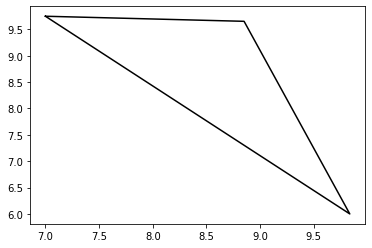

[1 1 1 1]


[1 1 1 0]


[1 1 0 0]


[[3.8693541  0.        ]
 [4.65389182 3.20908945]
 [0.         4.43111743]]
0 0
0.0
[-3 -2 -1  2  1]


[-2 -1  3  2  1]


[ 4  3  2  1 -1]


[ 4  3  2  1 -1]


[ 4  3  2  1 -1]


[ 2  1 -3 -2 -1]


[5 4 3 2 1]


[-1  4  3  2  1]


[-2 -1  3  2  1]


[-2 -1  3  2  1]


[-1  4  3  2  1]


[-1  4  3  2  1]


[-1  4  3  2  1]


[ 3  2  1 -2 -1]


[ 2  1 -3 -2 -1]


[ 3  2  1 -2 -1]


[ 3  2  1 -2 -1]


[ 4  3  2  1 -1]


[5 4 3 2 1]


[-3 -2 -1  2  1]




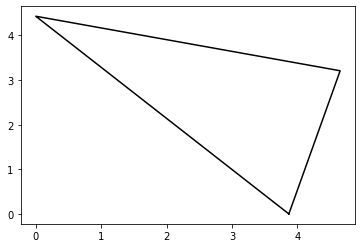

[0 0 0 1 1]


[0 0 1 1 1]


[1 1 1 1 0]


[1 1 1 1 0]


[1 1 1 1 0]


[[3.57118492 4.        ]
 [1.85000698 4.70915617]
 [0.         8.4003403 ]]
0 4
1.0
[ 2  1 -2 -1]


[ 3  2  1 -1]


[-1  2  1 -1]


[-2 -1  2  1]


[-3 -2 -1  1]


[-3 -2 -1  2  1]


[-1  3  2  1 -1]


[ 3  2  1 -2 -1]


[ 2  1 -3 -2 -1]


[ 1 -3 -2 -1]


[ 2  1 -2 -1]


[-1  2  1 -1]


[-1  3  2  1]


[-2 -1  2  1]


[-3 -2 -1  2  1]


[-2 -1  3  2  1]


[-1  3  2  1 -1]


[ 2  1 -3 -2 -1]




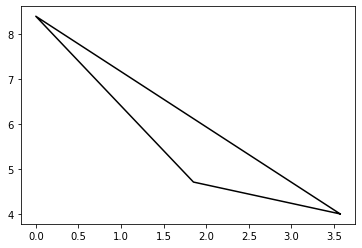

[1 1 0 0]


[1 1 1 0]


[0 1 1 0]


[0 0 1 1]


[0 0 0 1]


[[8.         1.50455765]
 [8.03492453 2.85589599]
 [9.00439476 0.        ]]
8 0
3.0
[ 1 -1]


[ 1 -1]


[2 1]


[-2 -1  1]


[3 2 1]


[2 1]


[-1  1]


[-1  1]


[3 2 1]


[ 1 -2 -1]




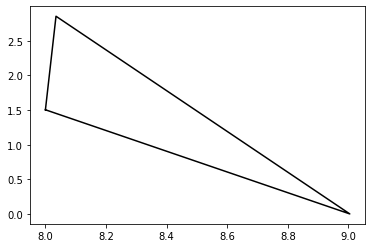

[1 0]


[1 0]


[1 1]


[[4.79452409 8.        ]
 [0.91345811 9.48940928]
 [0.         9.61533291]]
0 8
0.0
[-1  1]


[2 1]


[2 1]


[ 1 -1]


[ 1 -1]


[ 3  2  1 -2 -1]


[-1  4  3  2  1]


[-1  1]


[-1  1]


[2 1]


[2 1]


[ 1 -1]


[ 4  3  2  1 -1]


[-2 -1  3  2  1]




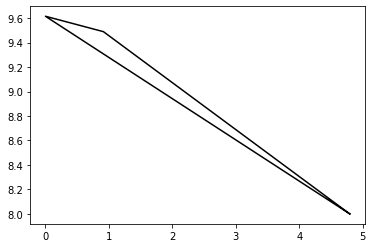

[0 1]


[1 1]


[1 1]


[1 0]


[1 0]


[[6.09471997 4.11162817]
 [4.6250296  1.        ]
 [4.         5.04845032]]
4 1
1.0
[ 2  1 -1]


[ 2  1 -1]


[ 2  1 -1]


[3 2 1]


[-1  2  1]


[-3 -2 -1  2  1]


[5 4 3 2 1]


[ 4  3  2  1 -1]


[ 2  1 -1]


[3 2 1]


[-1  2  1]


[-1  2  1]


[-1  2  1]


[-1  4  3  2  1]


[5 4 3 2 1]


[ 2  1 -3 -2 -1]




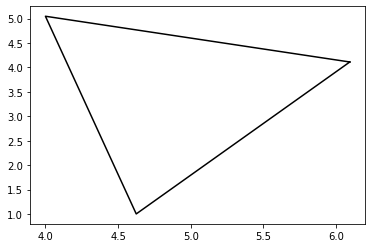

[1 1 0]


[1 1 0]


[1 1 0]


[1 1 1]


[0 1 1]


[[9.00034783 5.        ]
 [5.         6.89877121]
 [9.33417738 8.2024533 ]]
5 5
0.0
[-1  2  1 -1]


[ 3  2  1 -1]


[ 3  2  1 -1]


[4 3 2 1]


[4 3 2 1]


[-3 -2 -1  2  1]


[5 4 3 2 1]


[5 4 3 2 1]


[-1  4  3  2  1]


[4 3 2 1]


[4 3 2 1]


[-1  3  2  1]


[-1  3  2  1]


[-1  2  1 -1]


[ 4  3  2  1 -1]


[5 4 3 2 1]


[5 4 3 2 1]


[ 2  1 -3 -2 -1]




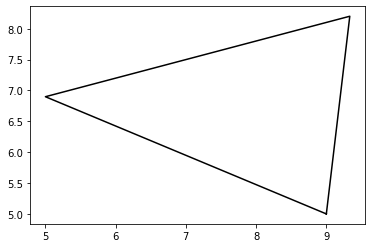

[0 1 1 0]


[1 1 1 0]


[1 1 1 0]


[1 1 1 1]


[1 1 1 1]


[[0.         7.44225246]
 [1.4692532  7.        ]
 [1.51929743 8.08193125]]
0 7
3.0
[2 1]


[-1  1]


[2 1]


[ 1 -1]


[ 1 -1]


[2 1]


[-1  1]


[2 1]




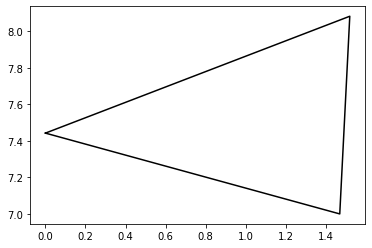

[1 1]


[0 1]


[[4.53939783 0.        ]
 [0.         4.3073901 ]
 [3.38584246 4.44525829]]
0 0
0.0
[-3 -2 -1  2  1]


[-2 -1  3  2  1]


[-1  4  3  2  1]


[5 4 3 2 1]


[ 3  2  1 -2 -1]


[ 4  3  2  1 -1]


[ 4  3  2  1 -1]


[-1  4  3  2  1]


[-2 -1  3  2  1]


[-3 -2 -1  2  1]


[-2 -1  3  2  1]


[5 4 3 2 1]


[ 4  3  2  1 -1]


[ 3  2  1 -2 -1]


[ 2  1 -3 -2 -1]


[ 2  1 -3 -2 -1]


[ 3  2  1 -2 -1]


[ 4  3  2  1 -1]


[-1  4  3  2  1]


[-1  4  3  2  1]




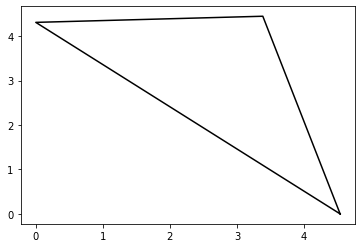

[0 0 0 1 1]


[0 0 1 1 1]


[0 1 1 1 1]


[1 1 1 1 1]


[1 1 1 0 0]


[[1.71283179 9.        ]
 [0.01458579 9.17331244]
 [0.         9.84690907]]
0 9
0.0
[1]


[1]


[2 1]


[1]


[1]


[2 1]




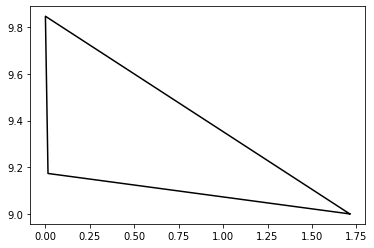

[1]


[1]


[[7.         0.        ]
 [9.62014446 0.81081634]
 [8.34853903 3.02655537]]
7 0
0.0
[ 3  2  1 -1]


[4 3 2 1]


[ 2  1 -2 -1]


[-1  1 -1]


[ 2  1 -1]


[3 2 1]


[3 2 1]


[-2 -1  2  1]


[4 3 2 1]


[-1  3  2  1]


[3 2 1]


[3 2 1]


[-1  2  1]


[-1  1 -1]




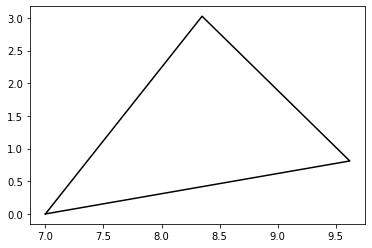

[1 1 1 0]


[1 1 1 1]


[1 1 0 0]


[[0.         5.        ]
 [3.74924212 7.84416924]
 [3.55765459 9.69980388]]
0 5
0.0
[ 2  1 -3 -2 -1]


[ 3  2  1 -2 -1]


[-1  3  2  1 -1]


[-2 -1  3  2  1]


[-3 -2 -1  1]


[-2 -1  2  1]


[-1  3  2  1]


[ 3  2  1 -1]


[ 2  1 -2 -1]


[ 3  2  1 -2 -1]


[-1  3  2  1 -1]


[-2 -1  3  2  1]


[-3 -2 -1  2  1]


[-2 -1  2  1]


[-1  3  2  1]


[ 3  2  1 -1]


[ 2  1 -2 -1]


[ 1 -3 -2 -1]




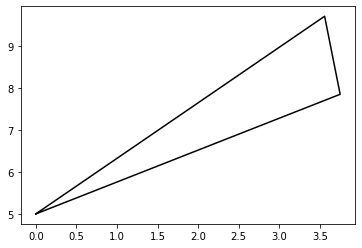

[1 1 0 0 0]


[1 1 1 0 0]


[0 1 1 1 0]


[0 0 1 1 1]




In [38]:

print_matrix(pal[0])
print('\n')
print_matrix(pal[1])

for i in range(len(items2)):
    print(items2[i].points)
    print(items2[i].lb_x, items2[i].lb_y)
    print(items2[i].rotation * 2 / math.pi)
    for r in range(4):
        print_matrix(items2[i].listMatrix[r])
    # print(items2[i].listMatrix[int(items2[i].rotation * 2 / math.pi)])
    items2[i].show_item()
    print_matrix(items2[i].matrix)